In [ ]:
import re
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\zafer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\__init__.py:160: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 2.0.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\zafer\AppData\Local\Packages\PythonSoftwareFoundation.Pyt

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\zafer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\zafer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1043, in launch

AttributeError: _ARRAY_API not found

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

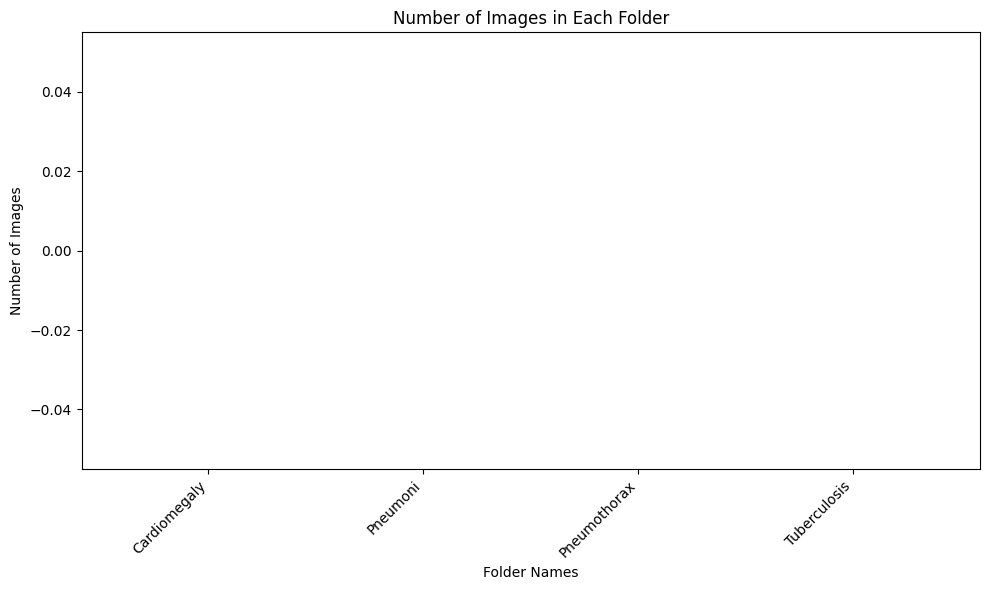

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_in_folders(parent_folder):
    """
    Count the number of images in each folder under the parent folder.

    Args:
        parent_folder (str): Path to the parent folder.

    Returns:
        dict: A dictionary with folder names as keys and image counts as values.
    """
    folder_image_counts = {}
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp')

    for folder_name in os.listdir(parent_folder):
        folder_path = os.path.join(parent_folder, folder_name)
        if os.path.isdir(folder_path):
            # Count image files in the folder
            image_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))
            folder_image_counts[folder_name] = image_count

    return dict(sorted(folder_image_counts.items()))

def plot_image_counts(image_counts):
    """
    Create a bar chart from the dictionary of image counts.

    Args:
        image_counts (dict): A dictionary with folder names as keys and image counts as values.
    """
    plt.figure(figsize=(10, 6))
    plt.bar(image_counts.keys(), image_counts.values())
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Folder Names')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Folder')
    plt.tight_layout()
    plt.show()

# Update the path to your parent folder
parent_folder = "datasets"

# Get the image counts and plot them
try:
    image_counts = count_images_in_folders(parent_folder)
    plot_image_counts(image_counts)
except FileNotFoundError:
    print("The specified folder does not exist. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


Load and Parse the Dataset
Create a Python script or Jupyter Notebook to load and label the dataset based on your rules:

In [ ]:
import os
import pandas as pd

# Define dataset path
DATASET_DIR = 'datasets/'

# Function to extract labels
def get_labels(file_path, condition):
    if condition == "Cardiomegaly":
        return "Normal" if file_path.startswith('0') else "Cardiomegaly"
    elif condition == "Pneumoni":
        if "NORMAL" in file_path:
            return "Normal"
        elif "bacterial" in file_path:
            return "Bacterial Pneumonia"
        elif "virus" in file_path:
            return "Viral Pneumonia"
    elif condition == "Pneumothorax":
        return "Positive" if "_1_" in file_path else "Negative"
    elif condition == "Tuberculosis":
        return "Normal" if "normal" in file_path else "Tuberculosis"

# Prepare a DataFrame
def create_dataset():
    data = []
    for condition in os.listdir(DATASET_DIR):
        condition_path = os.path.join(DATASET_DIR, condition)
        for dataset_type in ["train", "test"]:
            type_path = os.path.join(condition_path, dataset_type)
            for img_file in os.listdir(type_path):
                label = get_labels(img_file, condition)
                data.append({"image_path": os.path.join(type_path, img_file), "label": label, "condition": condition})
    return pd.DataFrame(data)

dataset = create_dataset()
print(dataset.head())


                               image_path   label     condition
0   datasets/Cardiomegaly\train\0_100.png  Normal  Cardiomegaly
1  datasets/Cardiomegaly\train\0_1002.png  Normal  Cardiomegaly
2  datasets/Cardiomegaly\train\0_1005.png  Normal  Cardiomegaly
3  datasets/Cardiomegaly\train\0_1006.png  Normal  Cardiomegaly
4   datasets/Cardiomegaly\train\0_101.png  Normal  Cardiomegaly


3. Preprocessing the Images
Normalize and Resize Images
Resize images to 224x224 and normalize pixel values (scale them between 0 and 1):

In [ ]:
import cv2
import numpy as np

# Image preprocessing function
def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load grayscale image
    image = cv2.resize(image, target_size)  # Resize
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=-1)  # Add channel dimension (224, 224, 1)
    image = np.repeat(image, 3, axis=-1) 
    return image

# Apply preprocessing to dataset
dataset['processed_image'] = dataset['image_path'].apply(preprocess_image)


Use Albumentations to augment the data:

In [ ]:
from albumentations import HorizontalFlip, RandomBrightnessContrast, Rotate
from albumentations.core.composition import OneOf
from albumentations.pytorch import ToTensorV2

augmentations = OneOf([
    HorizontalFlip(p=0.5),
    RandomBrightnessContrast(p=0.5),
    Rotate(limit=15, p=0.5),
])

def augment_image(image):
    augmented = augmentations(image=image)
    return augmented['image']


4. Splitting the Dataset
Split the dataset into training and validation sets:

In [ ]:
print(dataset['label'].isnull().sum())  # Check for missing values
print(dataset['label'].unique())       # Check unique labels


2405
['Normal' 'Cardiomegaly' None 'Viral Pneumonia' 'Negative' 'Positive'
 'Tuberculosis']


In [ ]:
dataset = dataset.dropna(subset=['label']).reset_index(drop=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
train_df, val_df = train_test_split(dataset, test_size=0.2, stratify=dataset['label'], random_state=42)

print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}")


Train size: 10876, Validation size: 2719


In [ ]:
# Convert processed images to NumPy arrays with float32 type
X_train = np.array(train_df['processed_image'].tolist(), dtype=np.float32)
X_val = np.array(val_df['processed_image'].tolist(), dtype=np.float32)


5. Creating the Model
Load a Pretrained Model
Use a pretrained model (e.g., ResNet50) for transfer learning:

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load pretrained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(dataset['label'].unique()), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

AttributeError: module 'tensorflow.core.framework.types_pb2' has no attribute 'DT_INT4'

In [ ]:
# Step 1: Define the data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Step 2: Load checkpoint and resume training
if os.path.exists('epoch_progress.json'):
    with open('epoch_progress.json', 'r') as f:
        progress = json.load(f)
    start_epoch = progress.get('last_epoch', 0)
else:
    start_epoch = 0

if os.path.exists('model_checkpoint.h5'):
    print("Loading model weights from checkpoint...")
    model.load_weights('model_checkpoint.h5')

# Step 3: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    initial_epoch=start_epoch,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[checkpoint, EpochTracker()]
)


Found 10876 validated image filenames belonging to 6 classes.
Found 2719 validated image filenames belonging to 6 classes.
Epoch 1/10
 44/340 [==>...........................] - ETA: 36:56 - loss: 4.2760 - accuracy: 0.4202

KeyboardInterrupt: 

6. Training the Model
Train the model using the processed dataset:

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
train_labels = to_categorical(train_df['label'].factorize()[0])
val_labels = to_categorical(val_df['label'].factorize()[0])

# Train the model
history = model.fit(
    np.array(train_df['processed_image'].tolist()), train_labels,
    validation_data=(np.array(val_df['processed_image'].tolist()), val_labels),
    epochs=1,
    batch_size=32
)


MemoryError: Unable to allocate 12.2 GiB for an array with shape (10876, 224, 224, 3) and data type float64

7. Generating Heat Maps
Use Grad-CAM to generate heat maps:

In [ ]:
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

def generate_grad_cam(image, model, class_idx):
    grad_model = Model(inputs=model.input, outputs=[model.output, model.get_layer("conv5_block3_out").output])
    with K.GradientTape() as tape:
        preds, conv_outputs = grad_model(np.expand_dims(image, axis=0))
        loss = preds[:, class_idx]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    heatmap = np.mean(pooled_grads * conv_outputs[0], axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# Plot Grad-CAM
def plot_grad_cam(image, heatmap):
    plt.imshow(image, cmap='gray')
    plt.imshow(heatmap, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.show()

# Generate and plot Grad-CAM
example_image = preprocess_image('path/to/sample/image.jpg')
heatmap = generate_grad_cam(example_image, model, class_idx=1)  # Adjust class_idx for target class
plot_grad_cam(example_image, heatmap)


NameError: name 'preprocess_image' is not defined